In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [80]:
df = np.load("C:/Users/Andres Salguero/Desktop/Proyecto 1Preng/proyecto_training_data.npy", mmap_mode=None, allow_pickle=False, fix_imports=True, encoding ='ASCII')
dataset = df

In [81]:
df.shape

(1460, 6)

In [82]:
np.shape(dataset)

(1460, 6)

In [87]:
separar = int(dataset.shape[0]*0.8)
dataset[0:, 0]/= 1000 
dataset[0:, 2]/= 1000

In [88]:
dtrain = dataset[0: separar,:]
dtest  = dataset[separar : , :]

In [91]:
print(dtrain)
print(dtest)
print(separar)

[[2.0850e-01 7.0000e+00 8.5600e-04 8.0000e+00 2.0030e+03 6.5000e+01]
 [1.8150e-01 6.0000e+00 1.2620e-03 6.0000e+00 1.9760e+03 8.0000e+01]
 [2.2350e-01 7.0000e+00 9.2000e-04 6.0000e+00 2.0010e+03 6.8000e+01]
 ...
 [2.3317e-01 7.0000e+00 1.5020e-03 7.0000e+00 2.0090e+03 7.9000e+01]
 [2.4535e-01 8.0000e+00 1.6940e-03 7.0000e+00 2.0080e+03 6.4000e+01]
 [1.7300e-01 6.0000e+00 9.5900e-04 7.0000e+00 2.0000e+03 5.8000e+01]]
[[2.35000e-01 6.00000e+00 1.23600e-03 7.00000e+00 1.93500e+03 1.20000e+02]
 [6.25000e-01 1.00000e+01 1.83100e-03 1.00000e+01 1.99500e+03 1.18000e+02]
 [1.71000e-01 6.00000e+00 1.11800e-03 6.00000e+00 1.97700e+03 7.60000e+01]
 ...
 [2.66500e-01 7.00000e+00 1.18800e-03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e-01 5.00000e+00 1.07800e-03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e-01 5.00000e+00 1.25600e-03 6.00000e+00 1.96500e+03 7.50000e+01]]
1168


In [93]:
dataset = pd.DataFrame(df, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])
dataset

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,0.208500,7.0,0.000856,8.0,2003.0,65.0
1,0.181500,6.0,0.001262,6.0,1976.0,80.0
2,0.223500,7.0,0.000920,6.0,2001.0,68.0
3,0.140000,7.0,0.000961,7.0,1915.0,60.0
4,0.250000,8.0,0.001145,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,0.175000,6.0,0.000953,7.0,1999.0,62.0
1456,0.210000,6.0,0.002073,7.0,1978.0,85.0
1457,0.266500,7.0,0.001188,9.0,1941.0,66.0
1458,0.142125,5.0,0.001078,5.0,1950.0,68.0


# Slicing Train/Test 80/20

In [19]:
ndataset = pd.DataFrame(dataset, columns =  ['SalePrice', 'OverallQual', '1stFlrSF'])
ndataset

,SalePrice,OverallQual,1stFlrSF
0,208500.0,7.0,856.0
1,181500.0,6.0,1262.0
2,223500.0,7.0,920.0
3,140000.0,7.0,961.0
4,250000.0,8.0,1145.0
...,...,...,...
1455,175000.0,6.0,953.0
1456,210000.0,6.0,2073.0
1457,266500.0,7.0,1188.0
1458,142125.0,5.0,1078.0


In [20]:
mask = np.random.rand(len(ndataset)) <= 0.8
df_train = df[mask]
df_test = df[~mask]

In [51]:
df_train =  pd.DataFrame(df_train, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])

In [52]:
df_test =  pd.DataFrame(df_test, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])

In [23]:
df_train.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,250000.0,8.0,1145.0,9.0,2000.0,84.0
4,143000.0,5.0,796.0,5.0,1993.0,85.0


In [24]:
df_test.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,140000.0,7.0,961.0,7.0,1915.0,60.0
1,129900.0,7.0,1022.0,8.0,1931.0,51.0
2,345000.0,9.0,1182.0,11.0,2005.0,85.0
3,90000.0,4.0,1296.0,6.0,1967.0,72.0
4,325300.0,8.0,1158.0,9.0,2005.0,101.0


# Analisis exploratorio de datos

In [25]:
df_train.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,960.000000
mean,181574.346644,6.112999,1166.620221,6.509771,1971.612574,69.728125
std,79561.614519,1.375184,386.960508,1.584936,30.225447,23.535256
min,34900.000000,1.000000,483.000000,3.000000,1872.000000,21.000000
25%,130000.000000,5.000000,884.000000,5.000000,1954.000000,59.000000
50%,163500.000000,6.000000,1088.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1383.000000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,4692.000000,12.000000,2010.000000,313.000000


In [15]:
df_test.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,295.000000,295.000000,295.000000,295.000000,295.000000,240.000000
mean,179748.108475,6.077966,1167.315254,6.525424,1968.423729,71.987500
std,87157.144964,1.396310,448.647573,1.719792,31.035860,31.141126
min,34900.000000,3.000000,483.000000,3.000000,1880.000000,21.000000
25%,127500.000000,5.000000,864.000000,5.000000,1948.000000,59.000000
50%,155900.000000,6.000000,1057.000000,6.000000,1970.000000,68.000000
75%,202150.000000,7.000000,1399.500000,7.500000,1999.000000,80.000000
max,755000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


In [16]:
ndataset.describe().round(4)

,SalePrice,OverallQual,1stFlrSF
count,1460.0000,1460.0000,1460.0000
mean,180921.1959,6.0993,1162.6267
std,79442.5029,1.3830,386.5877
min,34900.0000,1.0000,334.0000
25%,129975.0000,5.0000,882.0000
50%,163000.0000,6.0000,1087.0000
75%,214000.0000,7.0000,1391.2500
max,755000.0000,10.0000,4692.0000


# Graficar un histograma de la variable

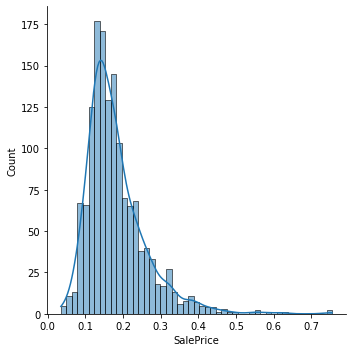

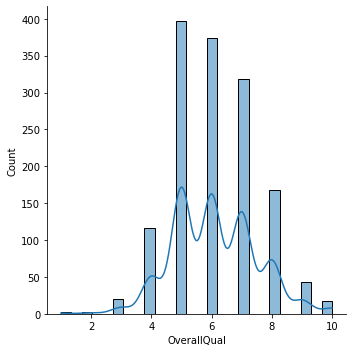

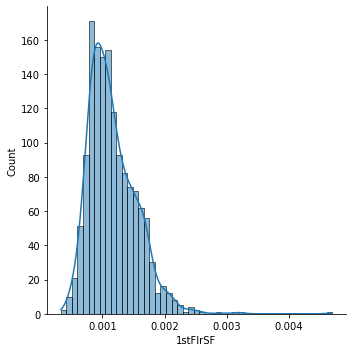

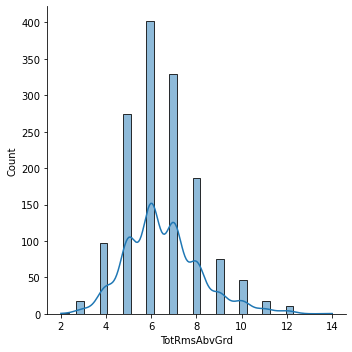

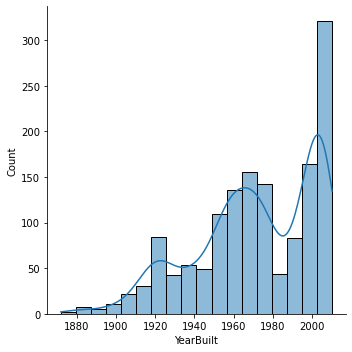

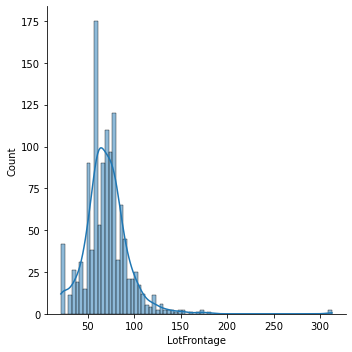

In [112]:
sns.displot(data=dataset, x="SalePrice", kde=True)
sns.displot(data=dataset, x="OverallQual", kde=True)
sns.displot(data=dataset, x="1stFlrSF", kde=True)
sns.displot(data=dataset, x="TotRmsAbvGrd", kde=True)
sns.displot(data=dataset, x="YearBuilt", kde=True)
sns.displot(data=dataset, x="LotFrontage", kde=True)

# 5. Para cada variable independiente x :

### Coef. de correlación de todas las variables: Seleccionamos las que tengan mayor correlación.

In [19]:
def colcCorrCoef(df, target):
    #X = df.copy()
    #X.drop([target], inplace = True)
    for col in df.columns:
        print('Correlación - ' + col + ":",
              df[target].corr(df[col], method = 'pearson'))

In [20]:
colcCorrCoef(dataset, 'SalePrice')

Correlación - SalePrice: 1.0
Correlación - OverallQual: 0.790981600583805
Correlación - 1stFlrSF: 0.6058521846919146
Correlación - TotRmsAbvGrd: 0.5337231555820275
Correlación - YearBuilt: 0.5228973328794974
Correlación - LotFrontage: 0.35179909657067826


### Graficar x vs y(scatterplot) usando matplotlib

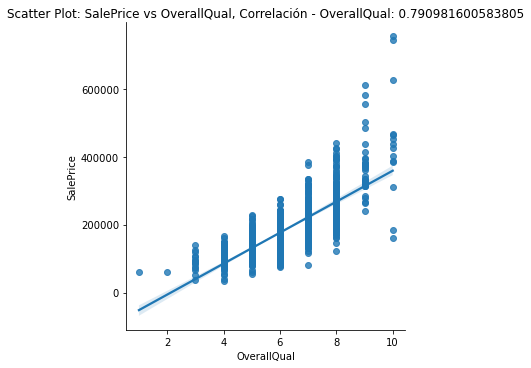

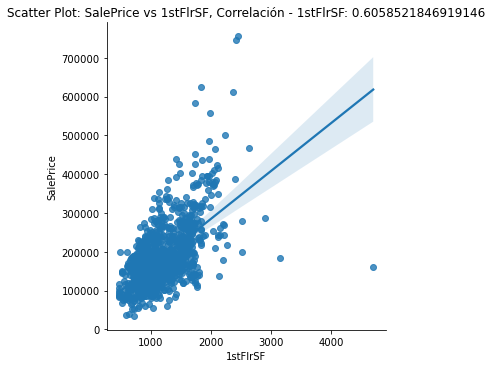

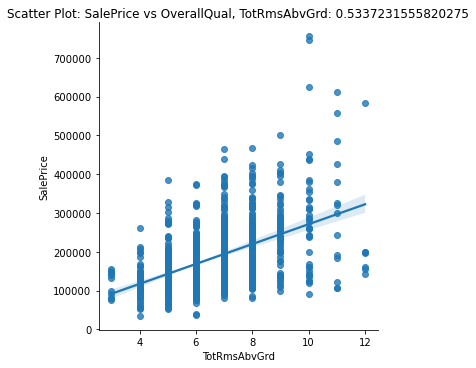

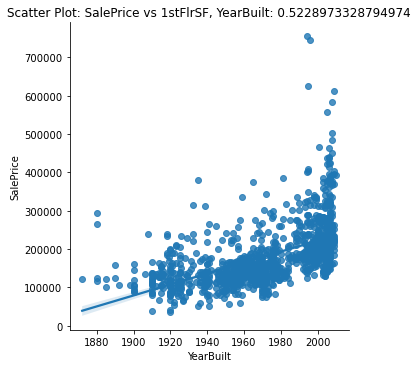

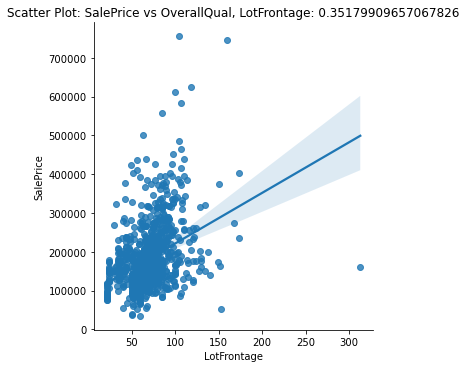

In [113]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df_train, lowess=False) 
plt.title("Scatter Plot: SalePrice vs OverallQual, Correlación - OverallQual: 0.790981600583805");

sns.lmplot(x='1stFlrSF', y='SalePrice', data=df_train, lowess=False) 
plt.title("Scatter Plot: SalePrice vs 1stFlrSF, Correlación - 1stFlrSF: 0.6058521846919146");

sns.lmplot(x='TotRmsAbvGrd', y='SalePrice', data=df_train, lowess=False) 
plt.title("Scatter Plot: SalePrice vs OverallQual, TotRmsAbvGrd: 0.5337231555820275");

sns.lmplot(x='YearBuilt', y='SalePrice', data=df_train, lowess=False) 
plt.title("Scatter Plot: SalePrice vs 1stFlrSF, YearBuilt: 0.5228973328794974");

sns.lmplot(x='LotFrontage', y='SalePrice', data=df_train, lowess=False) 
plt.title("Scatter Plot: SalePrice vs OverallQual, LotFrontage: 0.35179909657067826");


# Utilizar variable = OverallWual y 1stFlrSF para predecir SalePrice
### En base al analisis de correlación y visualización de variables vs SalePrice

In [ ]:
#parametros de la funcion

In [114]:
X = df_train['OverallQual']
Y = df_train['SalePrice']
epochs = 100
imprimir_error_cada = 20
learning_rate = 1


# Cuerpo de la función (clase)

In [115]:
unos = np.ones(np.shape(X)).reshape(-1, 1)
X = X.to_numpy().reshape(-1, 1)
A = np.hstack([X, unos])
errores = []
b0 = 10
b1 = 20

for i in range(epochs):
    betas = np.array([b1,b0]).reshape(-1, 1)
    yEstimado = np.matmul(A, betas)
    gradienteB0 = np.mean(yEstimado - Y.to_numpy())
    gradienteB1 = np.mean((yEstimado - Y.to_numpy())*X)
    b0 = b0 - learning_rate*gradienteB0
    b1 = b1 - learning_rate*gradienteB1
    
    if((i % imprimir_error_cada) == 0):
        errores.append(np.mean((yEstimado - Y.to_numpy())**2)*1/2)
        

    
print("Beta0: ", b0)
print("Beta1: ", b1)


Beta0:  -9.442742707598213e+162
Beta1:  -6.056964021199732e+163


In [116]:
errores

[19622951974.89883,
 8.559914564287539e+73,
 4.665695055944594e+137,
 2.543099021792345e+201,
 1.3861498784411805e+265]

# Creación de función

In [167]:
def modelo_entrenamiento(x,y,epoch,imprimir_error,learning_rate):
    error = np.zeros(epoch)
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    modelo_dict = {}
    modelo = np.array([0.0,0.0]) 
    gradientes = np.array([0.0,0.0])
    print_counter = 1
    for i in range(0,epoch):
        yEstimado = (np.matmul(data,modelo)).reshape(-1,1)
        error[i] = 0.5 * (np.average((y-yEstimado)**2))
        gradientes = np.average((yEstimado-y)*data, axis=0)
        modelo -= (learning_rate*gradientes)
        modelo_dict[i] = modelo.copy()
        if (print_counter % imprimir_error) == 0:
            print("Error: "+str(error[i]))
        
        print_counter += 1
    return modelo_dict,error

def plot_error(error,title):
    plt.plot(range(0,error.shape[0]),error)
    plt.title(title+" - Errores")
    plt.show()
    
def plot_model(x,y,modelo,n):
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    
    for i in range(n,len(modelo)+1,n):
        key = i-1
        yEstimado = (np.matmul(data,modelo[key])).reshape(-1,1)
        
        plt.plot()
        plt.scatter(x,y)
        plt.plot(x,yEstimado, color='r')
        plt.title("Iteración="+str(i)+", m="+str(round(modelo[key][0],2))+", b="+str(round(modelo[key][1],2)))
        plt.show()
        


In [168]:
x = dtrain[:,1].reshape(-1,1)
y = dtrain[:,0].reshape(-1,1)
colname=["SalePrice", "OverallQual", "1stFlrSF"]

Error: 0.0013835277441567157
Error: 0.0013725833614180564
Error: 0.0013621452072482844
Error: 0.0013521898662232428
Error: 0.0013426950059909726
Error: 0.001333639327174589
Error: 0.0013250025155923828
Error: 0.0013167651966879644
Error: 0.0013089088920682282
Error: 0.0013014159780516314
Error: 0.0012942696461338144
Error: 0.0012874538652818672
Error: 0.0012809533459726603
Error: 0.0012747535058945715
Error: 0.0012688404372356672
Error: 0.0012632008754849553
Error: 0.0012578221696767286
Error: 0.0012526922540112436
Error: 0.0012477996207880724
Error: 0.001243133294591419


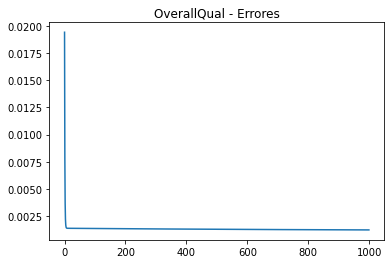

Error: 0.0013913872090431587
Error: 0.0013878486854348449
Error: 0.001384450541012475
Error: 0.0013811003249020468
Error: 0.001377797360691528
Error: 0.0013745409819337462
Error: 0.0013713305315811925
Error: 0.0013681653618534447
Error: 0.0013650448341064637
Error: 0.0013619683187037304


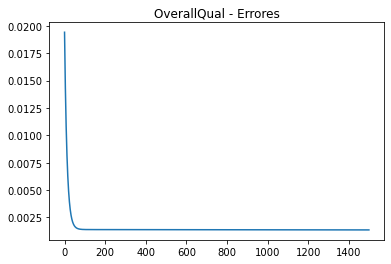

Error: 0.005038410635515044
Error: 0.002125076747368279
Error: 0.001540100749056788
Error: 0.001422344263720589
Error: 0.001398342860278944
Error: 0.0013931554784647065
Error: 0.00139174410543436
Error: 0.001391091144305315
Error: 0.001390591069136421
Error: 0.001390122371034651


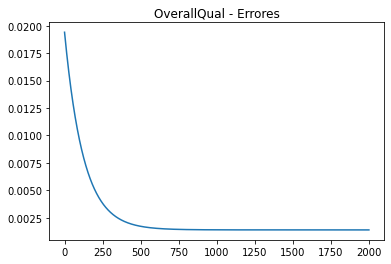

In [169]:
model_quality, error_Ovequality = modelo_entrenamiento(x,y,1000,50,0.01)
plot_error(error_Ovequality,colname[1])

model_quality, error_Ovequality = modelo_entrenamiento(x,y,1500,150,0.001)
plot_error(error_Ovequality,colname[1])

model_quality, error_Ovequality = modelo_entrenamiento(x,y,2000,200,0.0001)
plot_error(error_Ovequality,colname[1])

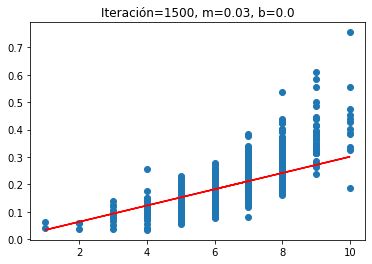

In [170]:
plot_model(x,y,model_quality,1500)

Error: 0.00310302130120816
Error: 0.0031027482725933253
Error: 0.003102475307238082
Error: 0.0031022024051277743
Error: 0.0031019295662477477
Error: 0.0031016567905833518
Error: 0.0031013840781199398
Error: 0.003101111428842868
Error: 0.0031008388427374977
Error: 0.0031005663197891916
Error: 0.0031002938599833155
Error: 0.003100021463305241
Error: 0.0030997491297403406
Error: 0.003099476859273992
Error: 0.003099204651891575


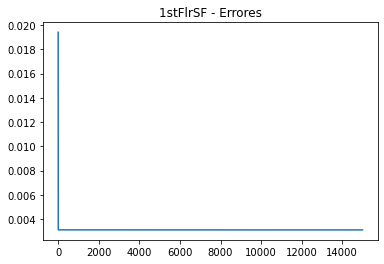

Error: 0.0031032875452853626
Error: 0.0031032809640524385
Error: 0.003103274382856262
Error: 0.003103267801696832
Error: 0.0031032612205741496
Error: 0.0031032546394882134
Error: 0.0031032480584390243
Error: 0.0031032414774265814
Error: 0.0031032348964508843
Error: 0.003103228315511934
Error: 0.0031032217346097283
Error: 0.0031032151537442685


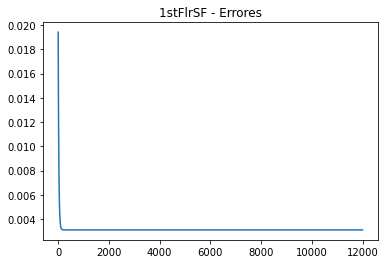

Error: 0.0031030245878055727
Error: 0.0031027548475634726
Error: 0.0031024851690661646
Error: 0.0031022155522995136
Error: 0.00310194599724939
Error: 0.0031016765039016663
Error: 0.0031014070722422183
Error: 0.0031011377022569266
Error: 0.003100868393931672
Error: 0.0031005991472523413


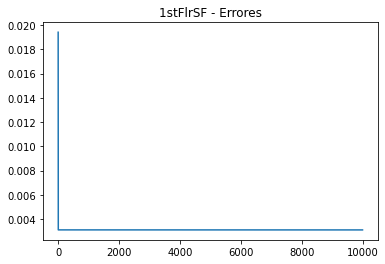

In [174]:
x = dtrain[:,2].reshape(-1,1)
y = dtrain[:,0].reshape(-1,1)

model_1stFlrSF, error_1stFlrSF = modelo_entrenamiento(x,y,15000,1000,0.83)
plot_error(error_1stFlrSF,colname[2])

model_1stFlrSF, error_1stFlrSF = modelo_entrenamiento(x,y,12000,1000,0.02)
plot_error(error_1stFlrSF,colname[2])

model_1stFlrSF, error_1stFlrSF = modelo_entrenamiento(x,y,10000,1000,0.82)
plot_error(error_1stFlrSF,colname[2])

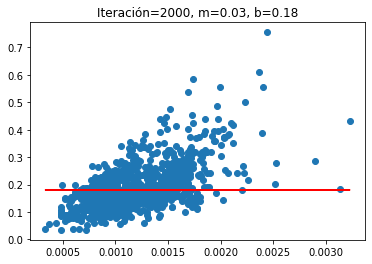

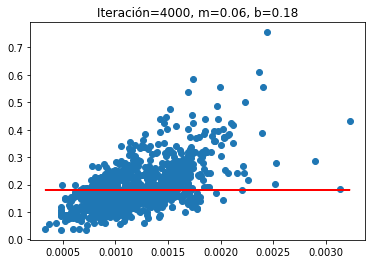

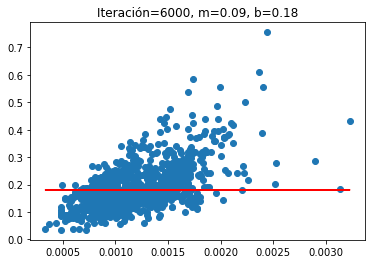

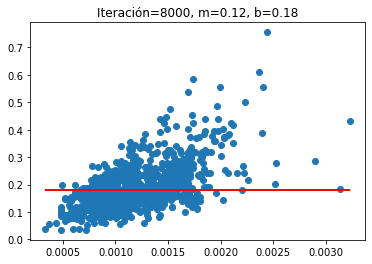

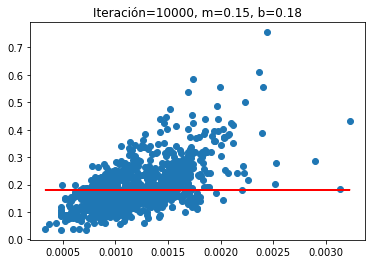

In [175]:
plot_model(x,y,model_1stFlrSF,2000)

In [215]:
x = dtrain[:,1].reshape(-1,1)
y = dtrain[:,0].reshape(-1,1)

FirstLR_OverQuall = LinearRegression()
FirstLR_OverQuall.fit(x, y)

LinearRegression()

In [225]:
x = dtrain[:,2].reshape(-1,1)
y = dtrain[:,0].reshape(-1,1)

FirstLR_1stFlrSF = LinearRegression()
FirstLR_1stFlrSF.fit(x, y)

LinearRegression()

In [238]:
def get_predictions(x, manual_model, sl_model):
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    
    manual_pred = np.matmul(data,manual_model)
    sl_pred = sl_model.predict(x)
    avg_pred = (manual_pred + sl_pred)/2
        
    return manual_pred, sl_pred, avg_pred
    

In [239]:
def calculate_error(y,yhat):
    return (0.5 * (np.average((y-yhat)**2)))

In [242]:
x = dtest[:,1].reshape(-1,1)
y = dtest[:,0].reshape(-1,1)

manual_pred_quality, sl_pred_quality, avg_pred_quality = get_predictions(x, model_quality[(len(model_quality)-1)], FirstLR_OverQuall )
manual_error_quality = calculate_error(y,manual_pred_quality)
sl_error_quality = calculate_error(y,sl_pred_quality)
avg_error_quality = calculate_error(y,avg_pred_quality)

print("Error Modelo Manual: "+str(round(manual_error_quality,100)))
print("Error Modelo scikit-learn: "+str(round(sl_error_quality,100)))
print("Error Promedio: "+str(round(avg_error_quality,100)))

Error Modelo Manual: 0.0042281000382848035
Error Modelo scikit-learn: 0.0013150913044743195
Error Promedio: 0.0020436252607607106


In [244]:
x = dtest[:,2].reshape(-1,1)
y = dtest[:,0].reshape(-1,1)

manual_pred_1flrsf, sl_pred_1flrsf, avg_pred_1flrsf = get_predictions(x, model_1flrsf[(len(model_1flrsf)-1)], FirstLR_1stFlrSF )
manual_error_1flrsf = calculate_error(y,manual_pred_1flrsf)
sl_error_1flrsf = calculate_error(y,sl_pred_1flrsf)
avg_error_1flrsf = calculate_error(y,avg_pred_1flrsf)

print("Error Modelo Manual: "+str(round(manual_error_1flrsf,100)))
print("Error Modelo scikit-learn: "+str(round(sl_error_1flrsf,100)))
print("Error Promedio: "+str(round(avg_error_1flrsf,100)))

Error Modelo Manual: 0.0033540478910190183
Error Modelo scikit-learn: 0.0022927691373459368
Error Promedio: 0.0024253603693409915


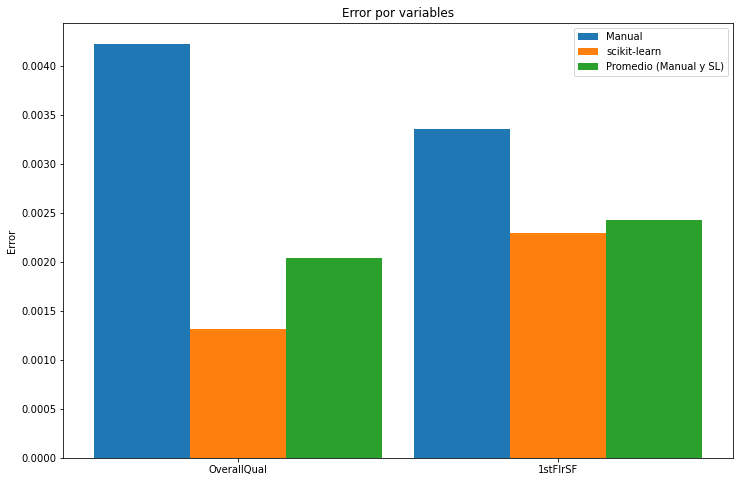

In [247]:
f, ax = plt.subplots(figsize=(12,8))
labels = [colname[1], colname[2]]
width = 0.30
x_plt = np.arange(len(labels))

rects1 = ax.bar(x_plt, (manual_error_quality,manual_error_1flrsf), width, label='Manual')
rects2 = ax.bar(x_plt + width, (sl_error_quality,sl_error_1flrsf), width, label='scikit-learn')
rects3 = ax.bar(x_plt + (2*width), (avg_error_quality,avg_error_1flrsf), width, label='Promedio (Manual y SL)')

ax.set_ylabel('Error')
ax.set_title('Error por variables')
ax.set_xticks(x_plt + width)
ax.set_xticklabels(labels)
ax.legend()
plt.show()